In [3]:
from __future__ import print_function
import os
import cv2
import imageio
import PIL.Image
import numpy as np
import tensorflow as tf
from button_detection import ButtonDetector
from character_recognition import CharacterRecognizer
import matplotlib.pyplot as plt
import time

In [4]:
def warm_up(detector, recognizer):
    image = imageio.imread('./test_panels/1.jpg')
    button = imageio.imread('./test_buttons/0_0.png')
    detector.predict(image)
    recognizer.predict(button)

def predict(img_np, recognizer, detector):
    boxes, scores, _ = detector.predict(img_np, True)
    button_patches, button_positions, _ = button_candidates(boxes, scores, img_np)

    for button_img, button_pos in zip(button_patches, button_positions):
        button_text, button_score, button_draw =recognizer.predict(button_img, draw=True)
        x_min, y_min, x_max, y_max = button_pos
        button_rec = cv2.resize(button_draw, (x_max-x_min, y_max-y_min))
        detector.image_show[y_min+6:y_max-6, x_min+6:x_max-6] = button_rec[6:-6, 6:-6]
    return detector.image_show

def button_candidates(boxes, scores, image):
    img_height = image.shape[0]
    img_width = image.shape[1]

    button_scores = []
    button_patches = []
    button_positions = []

    for box, score in zip(boxes, scores):
        if score < 0.5: continue

        y_min = int(box[0] * img_height)
        x_min = int(box[1] * img_width)
        y_max = int(box[2] * img_height)
        x_max = int(box[3] * img_width)

        button_patch = image[y_min: y_max, x_min: x_max]
        button_patch = cv2.resize(button_patch, (180, 180))

        button_scores.append(score)
        button_patches.append(button_patch)
        button_positions.append([x_min, y_min, x_max, y_max])
    return button_patches, button_positions, button_scores

In [5]:
detector = ButtonDetector()
recognizer = CharacterRecognizer(verbose=False)
warm_up(detector, recognizer)    




button detector initialized!
character recognizer initialized!


CPU times: user 5 s, sys: 1.28 s, total: 6.28 s
Wall time: 1.19 s


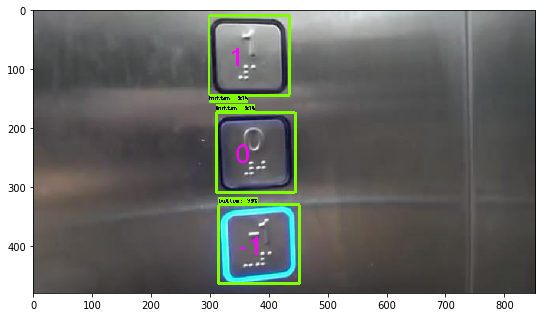

In [10]:
%%time
img = PIL.Image.open('test_panels/17.jpg')
img_np = np.array(img)
if img_np.shape[-1] == 4:
    img_np = img_np[:,:,:3]
tmp = predict(img_np, recognizer, detector)
plt.figure(figsize=(9,9))
plt.imshow(tmp)